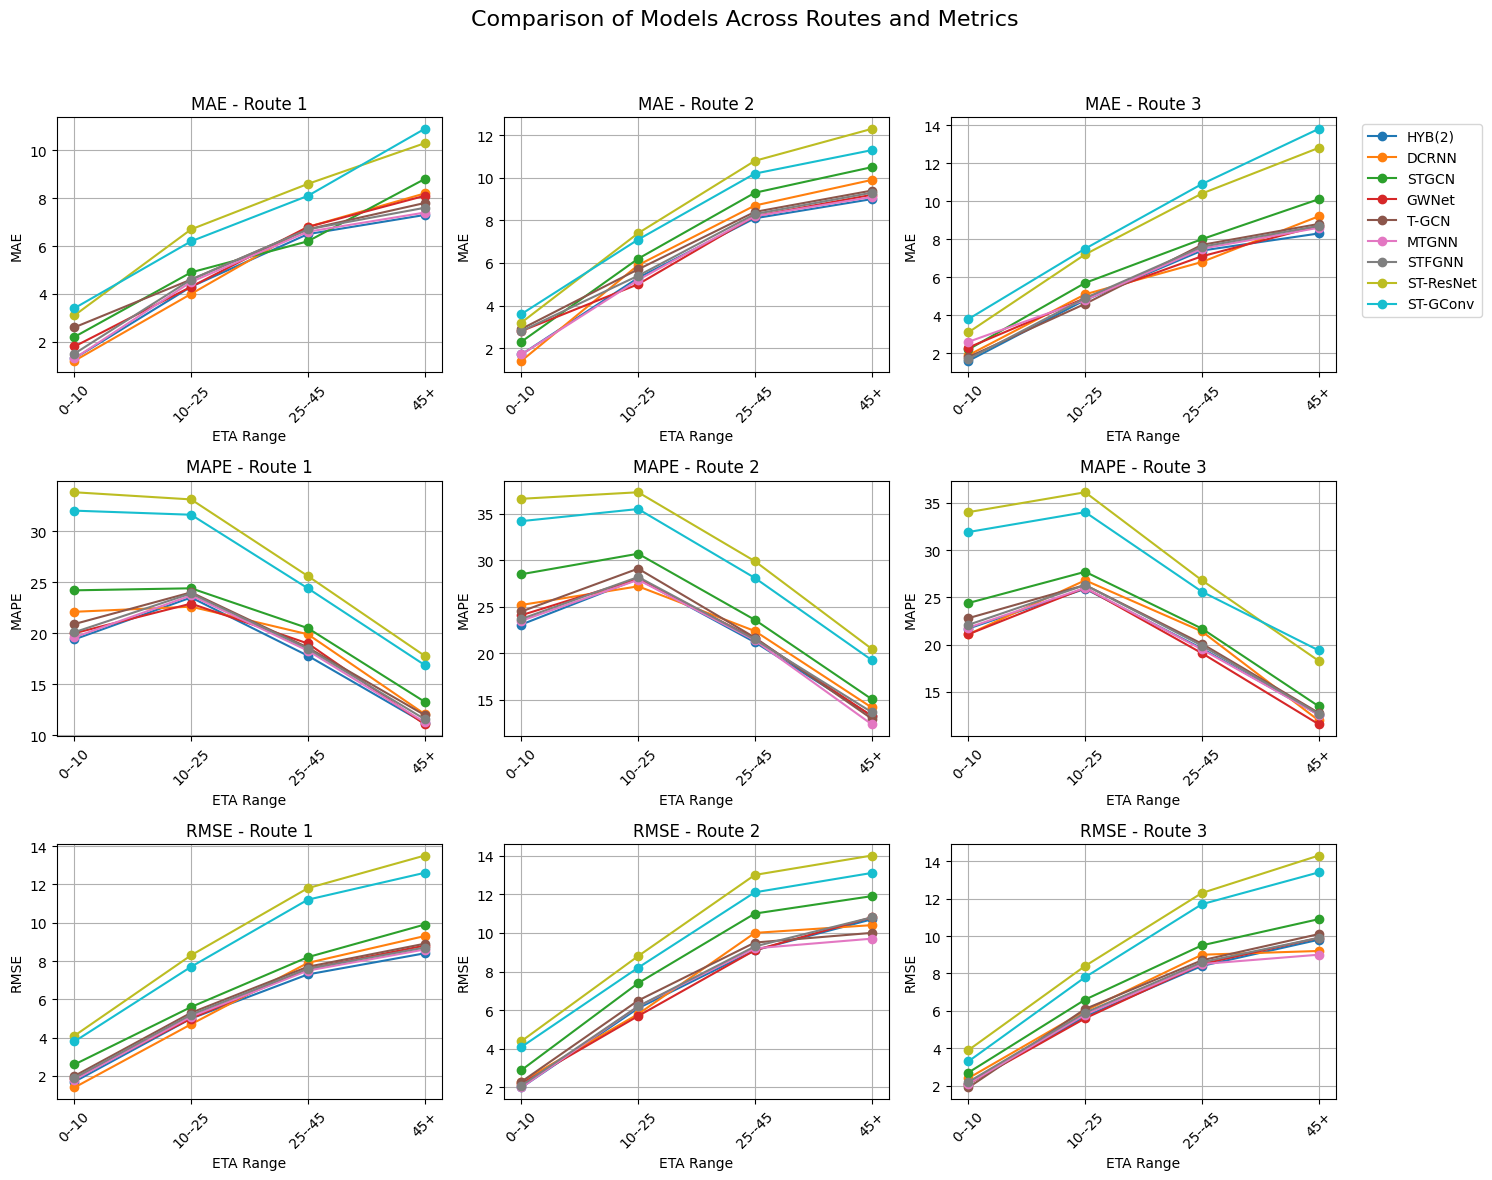

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table, excluding 'Overall'
models = ['HYB(2)', 'DCRNN', 'STGCN', 'GWNet', 'T-GCN', 'MTGNN', 'STFGNN', 'ST-ResNet', 'ST-GConv']
metrics = ['MAE', 'MAPE', 'RMSE']
routes = ['Route 1', 'Route 2', 'Route 3']
ranges = ['0--10', '10--25', '25--45', '45+']

# Data for each metric and route
data = {
    'MAE': {
        'Route 1': [
            [1.3, 4.3, 6.5, 7.3],  # HYB(2)
            [1.2, 4.0, 6.8, 8.2],  # DCRNN
            [2.2, 4.9, 6.2, 8.8],  # STGCN
            [1.8, 4.3, 6.8, 8.1],  # GWNet
            [2.6, 4.6, 6.7, 7.8],  # T-GCN
            [1.3, 4.5, 6.6, 7.4],  # MTGNN
            [1.5, 4.6, 6.7, 7.6],  # STFGNN
            [3.1, 6.7, 8.6, 10.3], # ST-ResNet
            [3.4, 6.2, 8.1, 10.9]  # ST-GConv
        ],
        'Route 2': [
            [1.7, 5.3, 8.1, 9.0],
            [1.4, 5.9, 8.7, 9.9],
            [2.3, 6.2, 9.3, 10.5],
            [2.8, 5.0, 8.2, 9.2],
            [2.9, 5.7, 8.4, 9.4],
            [1.7, 5.2, 8.2, 9.1],
            [2.8, 5.4, 8.3, 9.3],
            [3.2, 7.4, 10.8, 12.3],
            [3.6, 7.1, 10.2, 11.3]
        ],
        'Route 3': [
            [1.6, 4.8, 7.4, 8.3],
            [1.9, 5.1, 6.8, 9.2],
            [2.2, 5.7, 8.0, 10.1],
            [2.3, 4.9, 7.1, 8.7],
            [1.8, 4.6, 7.7, 8.8],
            [2.6, 4.8, 7.5, 8.6],
            [1.7, 4.9, 7.6, 8.7],
            [3.1, 7.2, 10.4, 12.8],
            [3.8, 7.5, 10.9, 13.8]
        ]
    },
    'MAPE': {
        'Route 1': [
            [19.4, 23.5, 17.8, 11.2],
            [22.1, 22.6, 19.9, 12.1],
            [24.2, 24.4, 20.5, 13.3],
            [20.0, 22.9, 19.0, 11.1],
            [20.9, 24.0, 18.6, 12.0],
            [19.6, 23.7, 18.3, 11.3],
            [20.1, 23.9, 18.5, 11.6],
            [33.8, 33.1, 25.6, 17.8],
            [32.0, 31.6, 24.4, 16.9]
        ],
        'Route 2': [
            [23.1, 28.0, 21.2, 13.3],
            [25.2, 27.2, 22.4, 14.2],
            [28.5, 30.7, 23.6, 15.1],
            [24.1, 28.0, 21.6, 13.3],
            [24.5, 29.1, 21.7, 13.0],
            [23.5, 27.9, 21.4, 12.4],
            [23.7, 28.2, 21.5, 13.7],
            [36.6, 37.3, 29.9, 20.5],
            [34.2, 35.5, 28.1, 19.3]
        ],
        'Route 3': [
            [21.7, 25.9, 19.6, 12.6],
            [21.1, 26.8, 21.4, 12.0],
            [24.4, 27.7, 21.7, 13.5],
            [21.1, 26.0, 19.1, 11.6],
            [22.8, 26.3, 20.1, 12.8],
            [21.8, 26.0, 19.5, 12.6],
            [22.1, 26.3, 19.9, 12.7],
            [34.0, 36.1, 26.8, 18.3],
            [31.9, 34.0, 25.6, 19.4]
        ]
    },
    'RMSE': {
        'Route 1': [
            [1.7, 5.0, 7.3, 8.4],
            [1.4, 4.7, 7.9, 9.3],
            [2.6, 5.6, 8.2, 9.9],
            [1.9, 5.0, 7.6, 8.8],
            [2.0, 5.3, 7.7, 8.9],
            [1.8, 5.1, 7.5, 8.6],
            [1.9, 5.2, 7.6, 8.7],
            [4.1, 8.3, 11.8, 13.5],
            [3.8, 7.7, 11.2, 12.6]
        ],
        'Route 2': [
            [2.0, 6.1, 9.1, 10.7],
            [2.3, 5.8, 10.0, 10.4],
            [2.9, 7.4, 11.0, 11.9],
            [2.2, 5.7, 9.1, 10.8],
            [2.3, 6.5, 9.5, 10.0],
            [2.0, 6.2, 9.2, 9.7],
            [2.1, 6.2, 9.3, 10.8],
            [4.4, 8.8, 13.0, 14.0],
            [4.1, 8.2, 12.1, 13.1]
        ],
        'Route 3': [
            [2.1, 5.7, 8.4, 9.8],
            [2.4, 6.0, 9.0, 9.2],
            [2.7, 6.6, 9.5, 10.9],
            [2.1, 5.6, 8.5, 9.9],
            [1.9, 6.1, 8.7, 10.1],
            [2.1, 5.8, 8.5, 9.0],
            [2.2, 5.9, 8.6, 9.9],
            [3.9, 8.4, 12.3, 14.3],
            [3.3, 7.8, 11.7, 13.4]
        ]
    }
}

# Create a 3x3 subplot grid for each metric and route
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Comparison of Models Across Routes and Metrics', fontsize=16)

# Colors for different models
colors = plt.cm.tab10(np.linspace(0, 1, len(models)))

# Plot each metric for each route
for i, metric in enumerate(metrics):
    for j, route in enumerate(routes):
        ax = axes[i, j]
        for k, model in enumerate(models):
            values = data[metric][route][k]
            ax.plot(ranges, values, marker='o', label=model, color=colors[k])

        ax.set_title(f'{metric} - {route}')
        ax.set_xlabel('ETA Range')
        ax.set_ylabel(metric)
        ax.grid(True)
        if i == 0 and j == 2:  # Place legend in the top-right subplot
            ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save and show the plot
plt.savefig('model_comparison_plot.png')
plt.show()

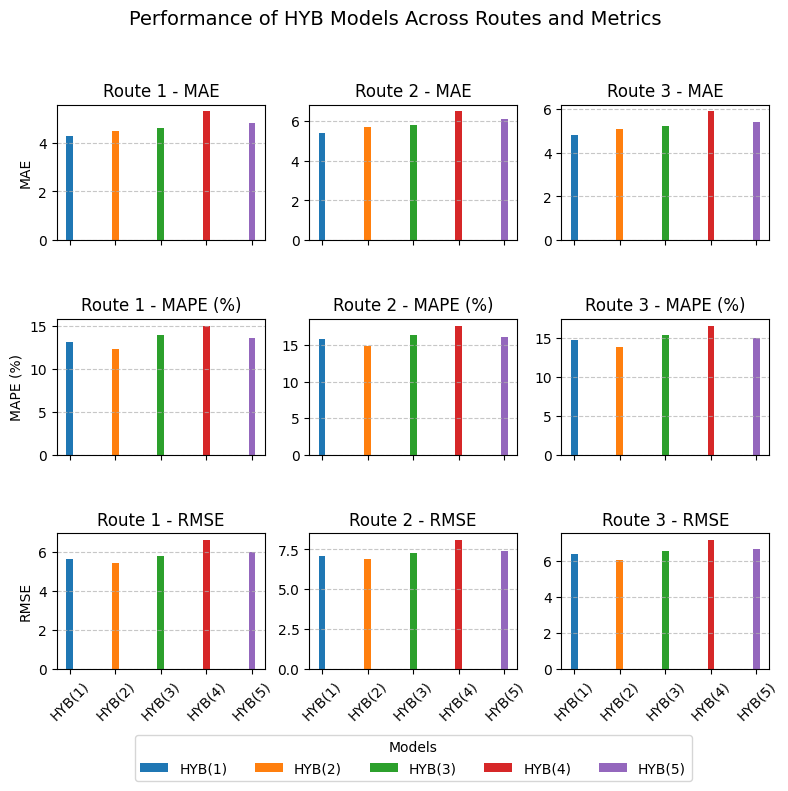

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

# Data from the table (overall MAE, MAPE, RMSE for each model and route)
models = ['HYB(1)', 'HYB(2)', 'HYB(3)', 'HYB(4)', 'HYB(5)']
routes = ['Route 1', 'Route 2', 'Route 3']

# MAE data (overall)
mae_data = {
    'Route 1': [4.3, 4.5, 4.6, 5.3, 4.8],
    'Route 2': [5.4, 5.7, 5.8, 6.5, 6.1],
    'Route 3': [4.8, 5.1, 5.2, 5.9, 5.4]
}

# MAPE data (overall)
mape_data = {
    'Route 1': [13.2, 12.3, 14.0, 15.1, 13.7],
    'Route 2': [15.9, 14.9, 16.4, 17.7, 16.1],
    'Route 3': [14.7, 13.8, 15.4, 16.6, 15.0]
}

# RMSE data (overall)
rmse_data = {
    'Route 1': [5.6, 5.4, 5.8, 6.6, 6.0],
    'Route 2': [7.1, 6.9, 7.3, 8.1, 7.4],
    'Route 3': [6.4, 6.1, 6.6, 7.2, 6.7]
}

# Set up the figure with GridSpec (3 rows for plots + 1 row for legend)
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(4, 3, figure=fig, height_ratios=[1, 1, 1, 0.15])

axes = [[fig.add_subplot(gs[r, c]) for c in range(3)] for r in range(3)]

# Colors for models
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
bar_width = 0.15
x = np.arange(len(models))

# ---- Plot MAE (Row 1) ----
for i, route in enumerate(routes):
    axes[0][i].bar(x, mae_data[route], bar_width, color=colors)
    axes[0][i].set_title(f'{route} - MAE')
    axes[0][i].grid(True, axis='y', linestyle='--', alpha=0.7)
    if i == 0:
        axes[0][i].set_ylabel('MAE')
    axes[0][i].set_xticks(x)
    axes[0][i].set_xticklabels([])

# ---- Plot MAPE (Row 2) ----
for i, route in enumerate(routes):
    axes[1][i].bar(x, mape_data[route], bar_width, color=colors)
    axes[1][i].set_title(f'{route} - MAPE (%)')
    axes[1][i].grid(True, axis='y', linestyle='--', alpha=0.7)
    if i == 0:
        axes[1][i].set_ylabel('MAPE (%)')
    axes[1][i].set_xticks(x)
    axes[1][i].set_xticklabels([])

# ---- Plot RMSE (Row 3) ----
for i, route in enumerate(routes):
    axes[2][i].bar(x, rmse_data[route], bar_width, color=colors)
    axes[2][i].set_title(f'{route} - RMSE')
    axes[2][i].grid(True, axis='y', linestyle='--', alpha=0.7)
    if i == 0:
        axes[2][i].set_ylabel('RMSE')
    axes[2][i].set_xticks(x)
    axes[2][i].set_xticklabels(models, rotation=45)

# ---- Dedicated legend row ----
legend_ax = fig.add_subplot(gs[3, :])
legend_ax.axis("off")
for i, model in enumerate(models):
    legend_ax.bar(0, 0, color=colors[i], label=model)  # dummy bars for legend
legend_ax.legend(loc="center", ncol=len(models), title="Models")

# ---- Title ----
fig.suptitle('Performance of HYB Models Across Routes and Metrics', fontsize=14)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('downsizing_analysis.png', dpi=300)
plt.show()


In [ ]:
plt.savefig('downsizing_analysis.png')

<Figure size 640x480 with 0 Axes>

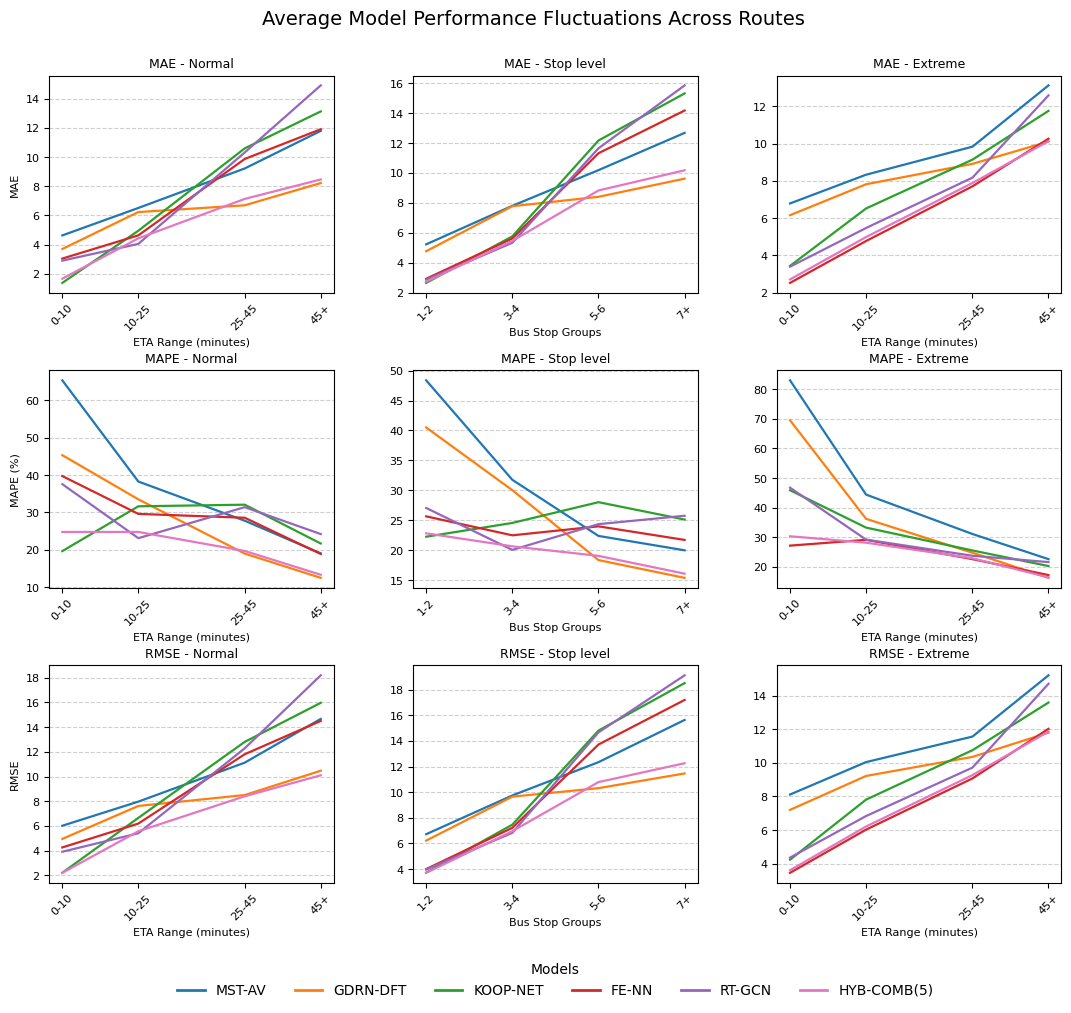

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D

# Define models, metrics, conditions
models = ['MST-AV', 'GDRN-DFT', 'KOOP-NET', 'FE-NN', 'RT-GCN', 'HYB-COMB(5)']
metrics = ['MAE', 'MAPE', 'RMSE']
conditions = ['Normal', 'Stop level', 'Extreme']
routes = ['1', '2', '3']

# --- full data dictionary (from your message) ---
data = {
    '1': {
        'Normal': {
            'MAE': {
                'MST-AV': [4.2, 5.9, 8.2, 10.3],
                'GDRN-DFT': [3.4, 5.6, 6.1, 7.2],
                'KOOP-NET': [1.2, 4.5, 9.2, 11.8],
                'FE-NN': [2.8, 4.1, 8.6, 10.6],
                'RT-GCN': [2.6, 3.7, 8.9, 12.9],
                'HYB-COMB(5)': [1.5, 3.9, 6.2, 7.6]
            },
            'MAPE': {
                'MST-AV': [60.9, 35.7, 25.6, 17.4],
                'GDRN-DFT': [42.5, 31.1, 17.7, 11.4],
                'KOOP-NET': [17.9, 29.5, 29.2, 20.1],
                'FE-NN': [37.3, 27.2, 26.1, 17.4],
                'RT-GCN': [34.9, 21.6, 28.5, 22.0],
                'HYB-COMB(5)': [22.8, 22.0, 17.9, 12.0]
            },
            'RMSE': {
                'MST-AV': [5.4, 7.2, 9.8, 12.7],
                'GDRN-DFT': [4.5, 6.8, 7.7, 9.1],
                'KOOP-NET': [1.9, 6.0, 11.0, 14.3],
                'FE-NN': [3.9, 5.4, 10.2, 12.8],
                'RT-GCN': [3.5, 4.9, 10.5, 15.6],
                'HYB-COMB(5)': [2.2, 5.0, 7.6, 9.3]
            }
        },
        'Stop level': {
            'MAE': {
                'MST-AV': [4.7, 6.8, 8.9, 11.1],
                'GDRN-DFT': [4.1, 6.9, 7.3, 8.6],
                'KOOP-NET': [2.3, 5.2, 10.6, 13.1],
                'FE-NN': [2.5, 5.0, 10.2, 12.3],
                'RT-GCN': [2.6, 4.7, 10.1, 13.8],
                'HYB-COMB(5)': [2.4, 4.9, 7.8, 8.9]
            },
            'MAPE': {
                'MST-AV': [44.8, 28.9, 20.4, 18.2],
                'GDRN-DFT': [36.6, 27.6, 16.7, 14.2],
                'KOOP-NET': [20.3, 22.8, 25.5, 22.6],
                'FE-NN': [23.2, 20.7, 22.2, 19.7],
                'RT-GCN': [25.2, 18.4, 22.1, 23.4],
                'HYB-COMB(5)': [20.5, 19.2, 17.1, 14.4]
            },
            'RMSE': {
                'MST-AV': [6.0, 8.4, 10.7, 13.6],
                'GDRN-DFT': [5.3, 8.5, 8.9, 10.2],
                'KOOP-NET': [3.2, 6.7, 12.8, 15.7],
                'FE-NN': [3.4, 6.4, 12.3, 14.8],
                'RT-GCN': [3.6, 6.0, 12.6, 16.5],
                'HYB-COMB(5)': [3.1, 6.2, 9.5, 10.8]
            }
        },
        'Extreme': {
            'MAE': {
                'MST-AV': [6.0, 7.2, 8.9, 11.4],
                'GDRN-DFT': [5.4, 7.0, 7.9, 8.8],
                'KOOP-NET': [3.1, 5.8, 7.8, 10.2],
                'FE-NN': [2.2, 4.3, 6.6, 9.1],
                'RT-GCN': [2.9, 4.9, 7.2, 10.8],
                'HYB-COMB(5)': [2.4, 4.6, 6.9, 8.9]
            },
            'MAPE': {
                'MST-AV': [75.9, 40.1, 28.7, 20.4],
                'GDRN-DFT': [63.5, 33.3, 22.6, 14.7],
                'KOOP-NET': [42.5, 30.5, 22.9, 18.3],
                'FE-NN': [24.7, 26.9, 20.3, 15.7],
                'RT-GCN': [42.0, 26.9, 21.6, 19.4],
                'HYB-COMB(5)': [26.7, 23.1, 20.8, 14.9]
            },
            'RMSE': {
                'MST-AV': [7.1, 8.6, 10.4, 13.1],
                'GDRN-DFT': [6.3, 8.2, 9.1, 10.2],
                'KOOP-NET': [3.9, 6.9, 9.1, 11.7],
                'FE-NN': [3.0, 5.4, 7.7, 10.6],
                'RT-GCN': [3.7, 6.1, 8.5, 12.5],
                'HYB-COMB(5)': [3.2, 5.6, 8.0, 10.4]
            }
        }
    },
    '2': {
        'Normal': {
            'MAE': {
                'MST-AV': [5.0, 7.0, 10.2, 13.4],
                'GDRN-DFT': [3.9, 6.8, 7.1, 9.3],
                'KOOP-NET': [1.6, 5.3, 12.2, 14.2],
                'FE-NN': [3.2, 5.2, 11.3, 13.1],
                'RT-GCN': [3.2, 4.3, 12.0, 17.2],
                'HYB-COMB(5)': [1.8, 4.8, 8.0, 9.2]
            },
            'MAPE': {
                'MST-AV': [67.0, 38.9, 28.8, 20.0],
                'GDRN-DFT': [45.9, 34.4, 19.2, 13.1],
                'KOOP-NET': [21.0, 32.2, 34.0, 22.1],
                'FE-NN': [40.1, 31.0, 30.1, 19.5],
                'RT-GCN': [38.7, 23.4, 33.5, 25.6],
                'HYB-COMB(5)': [26.9, 26.9, 21.2, 14.3]
            },
            'RMSE': {
                'MST-AV': [6.6, 8.6, 12.5, 16.9],
                'GDRN-DFT': [5.3, 8.4, 9.1, 12.0],
                'KOOP-NET': [2.6, 7.2, 15.0, 17.4],
                'FE-NN': [4.5, 7.1, 13.7, 16.2],
                'RT-GCN': [4.3, 5.8, 14.5, 21.3],
                'HYB-COMB(5)': [2.3, 6.0, 9.1, 11.0]
            }
        },
        'Stop level': {
            'MAE': {
                'MST-AV': [5.6, 8.8, 11.4, 14.1],
                'GDRN-DFT': [5.5, 8.5, 9.5, 10.3],
                'KOOP-NET': [3.0, 6.1, 13.7, 17.7],
                'FE-NN': [3.4, 6.1, 12.0, 16.0],
                'RT-GCN': [3.0, 5.9, 13.2, 17.8],
                'HYB-COMB(5)': [3.1, 6.0, 9.9, 11.1]
            },
            'MAPE': {
                'MST-AV': [49.1, 33.2, 23.3, 20.7],
                'GDRN-DFT': [43.0, 30.8, 19.2, 15.6],
                'KOOP-NET': [23.3, 24.7, 29.2, 26.6],
                'FE-NN': [27.3, 23.0, 24.2, 22.7],
                'RT-GCN': [27.2, 20.7, 25.5, 26.8],
                'HYB-COMB(5)': [24.1, 21.2, 20.0, 16.6]
            },
            'RMSE': {
                'MST-AV': [7.3, 11.2, 14.0, 17.6],
                'GDRN-DFT': [7.3, 10.7, 11.8, 12.4],
                'KOOP-NET': [4.3, 8.0, 16.9, 21.7],
                'FE-NN': [4.7, 7.9, 14.7, 19.7],
                'RT-GCN': [4.2, 7.6, 16.9, 21.8],
                'HYB-COMB(5)': [4.3, 7.7, 12.2, 13.4]
            }
        },
        'Extreme': {
            'MAE': {
                'MST-AV': [7.4, 9.4, 10.2, 14.6],
                'GDRN-DFT': [6.8, 8.3, 9.6, 11.2],
                'KOOP-NET': [3.6, 7.0, 10.5, 13.1],
                'FE-NN': [2.8, 5.0, 8.8, 11.0],
                'RT-GCN': [3.9, 5.8, 8.9, 14.3],
                'HYB-COMB(5)': [3.0, 5.2, 8.9, 11.1]
            },
            'MAPE': {
                'MST-AV': [85.0, 46.3, 30.9, 23.3],
                'GDRN-DFT': [71.4, 36.5, 25.1, 16.7],
                'KOOP-NET': [45.7, 33.7, 26.8, 20.9],
                'FE-NN': [28.0, 29.1, 23.6, 17.3],
                'RT-GCN': [49.4, 29.3, 24.2, 22.5],
                'HYB-COMB(5)': [31.5, 29.2, 23.7, 16.8]
            },
            'RMSE': {
                'MST-AV': [9.0, 11.5, 12.1, 17.1],
                'GDRN-DFT': [8.0, 9.9, 11.3, 13.2],
                'KOOP-NET': [4.3, 8.5, 12.5, 15.3],
                'FE-NN': [3.9, 6.4, 10.5, 13.0],
                'RT-GCN': [5.1, 7.3, 10.7, 16.9],
                'HYB-COMB(5)': [4.0, 6.6, 10.6, 13.1]
            }
        }
    },
    '3': {
        'Normal': {
            'MAE': {
                'MST-AV': [4.70, 6.64, 9.26, 11.68],
                'GDRN-DFT': [3.81, 6.30, 6.89, 8.16],
                'KOOP-NET': [1.34, 5.06, 10.39, 13.38],
                'FE-NN': [3.14, 4.61, 9.71, 12.02],
                'RT-GCN': [2.91, 4.16, 10.05, 14.63],
                'HYB-COMB(5)': [1.70, 4.60, 7.20, 8.60]
            },
            'MAPE': {
                'MST-AV': [68.2, 40.2, 28.9, 19.7],
                'GDRN-DFT': [47.6, 35.0, 20.0, 12.9],
                'KOOP-NET': [20.0, 33.2, 33.0, 22.8],
                'FE-NN': [41.8, 30.6, 29.5, 19.7],
                'RT-GCN': [39.1, 24.3, 32.2, 25.0],
                'HYB-COMB(5)': [24.6, 25.4, 19.9, 13.6]
            },
            'RMSE': {
                'MST-AV': [6.04, 8.10, 11.07, 14.40],
                'GDRN-DFT': [5.04, 7.65, 8.70, 10.31],
                'KOOP-NET': [2.12, 6.75, 12.42, 16.21],
                'FE-NN': [4.37, 6.07, 11.52, 14.51],
                'RT-GCN': [3.92, 5.51, 11.86, 17.69],
                'HYB-COMB(5)': [2.10, 5.70, 8.50, 10.00]
            }
        },
        'Stop level': {
            'MAE': {
                'MST-AV': [5.37, 7.80, 10.26, 12.84],
                'GDRN-DFT': [4.69, 7.92, 8.41, 9.95],
                'KOOP-NET': [2.63, 5.97, 12.21, 15.16],
                'FE-NN': [2.86, 5.74, 11.75, 14.23],
                'RT-GCN': [2.97, 5.39, 11.64, 15.97],
                'HYB-COMB(5)': [2.68, 5.46, 8.78, 10.53]
            },
            'MAPE': {
                'MST-AV': [51.2, 33.2, 23.5, 21.1],
                'GDRN-DFT': [41.9, 31.7, 19.2, 16.4],
                'KOOP-NET': [23.2, 26.2, 29.4, 26.2],
                'FE-NN': [26.5, 23.8, 25.6, 22.8],
                'RT-GCN': [28.8, 21.1, 25.5, 27.1],
                'HYB-COMB(5)': [23.9, 21.6, 20.1, 17.3]
            },
            'RMSE': {
                'MST-AV': [6.86, 9.64, 12.34, 15.73],
                'GDRN-DFT': [6.06, 9.76, 10.25, 11.80],
                'KOOP-NET': [3.66, 7.69, 14.74, 18.17],
                'FE-NN': [3.89, 7.35, 14.17, 17.12],
                'RT-GCN': [4.11, 6.88, 14.52, 19.09],
                'HYB-COMB(5)': [3.71, 6.97, 10.67, 12.59]
            }
        },
        'Extreme': {
            'MAE': {
                'MST-AV': [6.97, 8.40, 10.42, 13.40],
                'GDRN-DFT': [6.27, 8.16, 9.25, 10.34],
                'KOOP-NET': [3.60, 6.76, 9.13, 11.99],
                'FE-NN': [2.56, 5.01, 7.73, 10.70],
                'RT-GCN': [3.37, 5.71, 8.43, 12.69],
                'HYB-COMB(5)': [2.72, 5.15, 7.87, 10.41]
            },
            'MAPE': {
                'MST-AV': [88.2, 46.8, 33.6, 24.0],
                'GDRN-DFT': [73.7, 38.8, 26.5, 17.3],
                'KOOP-NET': [49.4, 35.5, 26.8, 21.5],
                'FE-NN': [28.7, 31.3, 23.8, 18.5],
                'RT-GCN': [48.8, 31.3, 25.3, 22.8],
                'HYB-COMB(5)': [32.7, 32.1, 24.1, 17.5]
            },
            'RMSE': {
                'MST-AV': [8.25, 10.03, 12.18, 15.40],
                'GDRN-DFT': [7.31, 9.56, 10.66, 11.98],
                'KOOP-NET': [4.53, 8.04, 10.65, 13.75],
                'FE-NN': [3.49, 6.29, 9.02, 12.46],
                'RT-GCN': [4.30, 7.11, 9.95, 14.69],
                'HYB-COMB(5)': [3.65, 6.45, 9.21, 12.08]
            }
        }
    }
}

# Colors for models
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#e377c2']

# Create figure with 4 rows (3 rows for plots + 1 small for legend)
fig = plt.figure(figsize=(11, 11))
gs = gridspec.GridSpec(4, 3, figure=fig, height_ratios=[1, 1, 1, 0.18])

# Create 3x3 axes for the plots
axes = [[fig.add_subplot(gs[r, c]) for c in range(3)] for r in range(3)]

for row, metric in enumerate(metrics):
    for col, cond in enumerate(conditions):
        ax = axes[row][col]

        # Determine x-axis based on condition
        if cond == 'Stop level':
            x = [1.5, 3.5, 5.5, 7.5]
            xticklabels = ['1-2', '3-4', '5-6', '7+']
            xlabel = 'Bus Stop Groups'
        else:
            x = [5, 17.5, 35, 47.5]
            xticklabels = ['0-10', '10-25', '25-45', '45+']
            xlabel = 'ETA Range (minutes)'

        # Plot average lines for each model (average across routes)
        for i, mod in enumerate(models):
            y_lists = [data[route][cond][metric][mod] for route in routes]
            y_avg = np.mean(y_lists, axis=0)
            ax.plot(x, y_avg, color=colors[i], label=mod, linewidth=1.6)

        ax.set_title(f'{metric} - {cond.capitalize()}', fontsize=9)
        ax.set_xlabel(xlabel, fontsize=8)
        if col == 0:
            ax.set_ylabel(metric + (' (%)' if metric == 'MAPE' else ''), fontsize=8)
        ax.set_xticks(x)
        ax.set_xticklabels(xticklabels, rotation=45, fontsize=8)
        ax.tick_params(axis='y', labelsize=8)
        ax.grid(True, axis='y', linestyle='--', alpha=0.6)

# --- Legend subplot using proxy Line2D handles (avoids passing strings as handles) ---
legend_ax = fig.add_subplot(gs[3, :])
legend_ax.axis("off")

legend_handles = [Line2D([0], [0], color=colors[i], lw=2) for i in range(len(models))]
legend_ax.legend(legend_handles, models, loc="center", ncol=len(models), title="Models", frameon=False)

# Overall title and spacing
fig.suptitle('Average Model Performance Fluctuations Across Routes', fontsize=14)
fig.subplots_adjust(top=0.92, bottom=0.08, left=0.06, right=0.98, hspace=0.45, wspace=0.28)

# Save and show
plt.savefig("indv_analysis.png", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
plt.savefig('indv_analysis.png')

<Figure size 640x480 with 0 Axes>

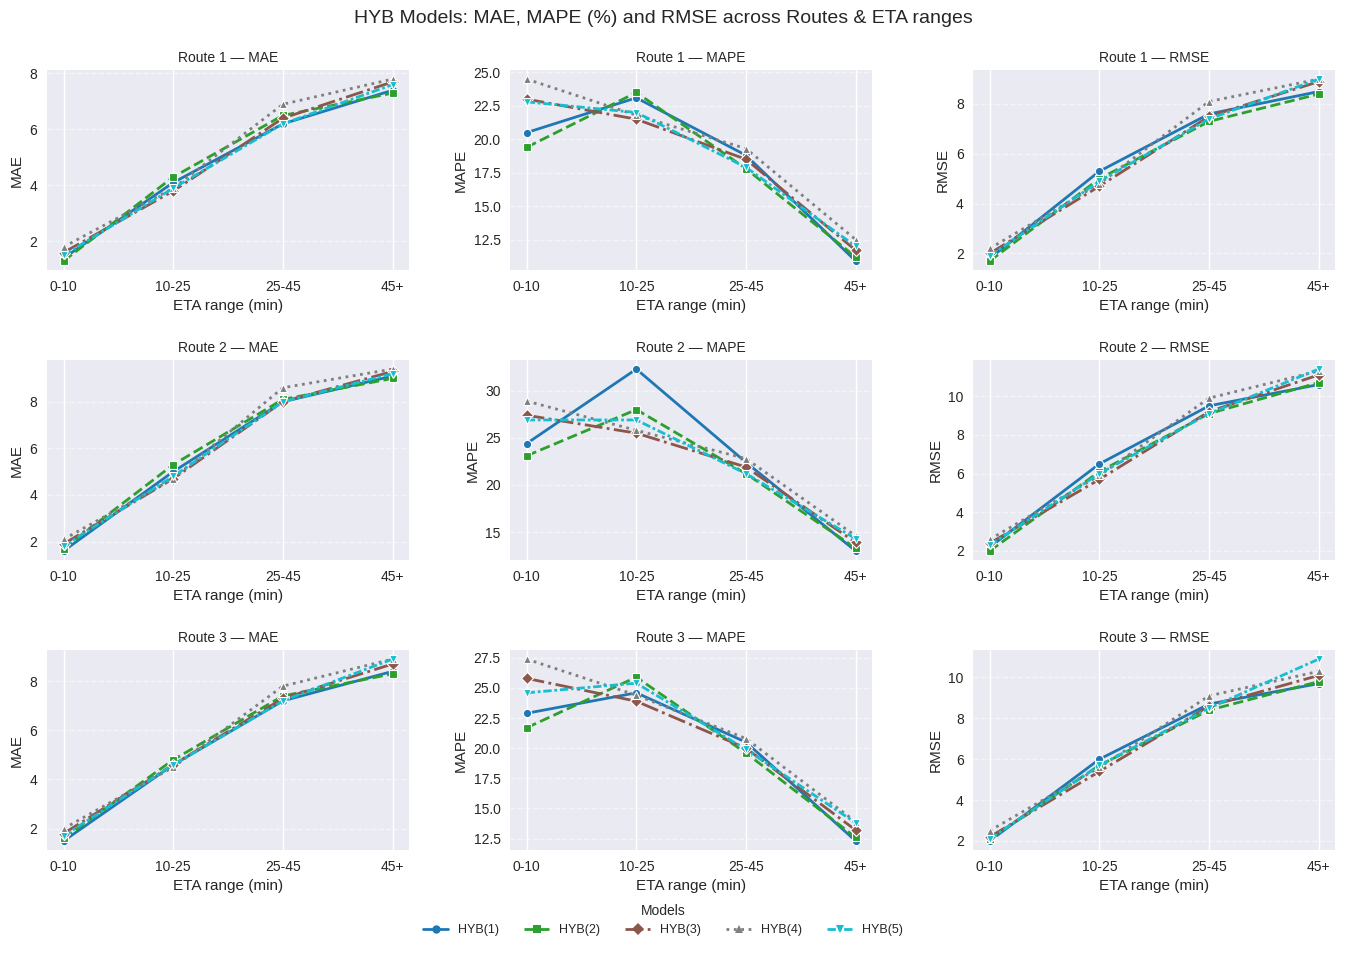

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# -------------------------
# Data exactly from Table 2
# -------------------------
routes = ["Route 1", "Route 2", "Route 3"]
models = ["HYB(1)", "HYB(2)", "HYB(3)", "HYB(4)", "HYB(5)"]
ranges = ["0-10", "10-25", "25-45", "45+"]
metrics = ["MAE", "MAPE", "RMSE"]

# metrics_data[route][metric] = list of lists (each inner list = values for a model across ETA ranges)
metrics_data = {
    "Route 1": {
        "MAE": [
            [1.4, 4.1, 6.2, 7.4],  # HYB(1)
            [1.3, 4.3, 6.5, 7.3],  # HYB(2)
            [1.6, 3.8, 6.4, 7.7],  # HYB(3)
            [1.8, 3.9, 6.9, 7.8],  # HYB(4)
            [1.5, 3.9, 6.2, 7.6],  # HYB(5)
        ],
        "MAPE": [
            [20.5, 23.1, 18.8, 10.9],
            [19.4, 23.5, 17.8, 11.2],
            [23.0, 21.5, 18.5, 11.7],
            [24.5, 21.8, 19.3, 12.5],
            [22.8, 22.0, 17.9, 12.0],
        ],
        "RMSE": [
            [1.8, 5.3, 7.6, 8.5],
            [1.7, 5.0, 7.3, 8.4],
            [2.0, 4.7, 7.5, 8.9],
            [2.2, 4.8, 8.1, 9.0],
            [1.9, 4.9, 7.4, 9.0],
        ],
    },
    "Route 2": {
        "MAE": [
            [1.6, 5.0, 8.0, 9.1],  # HYB(1)
            [1.7, 5.3, 8.1, 9.0],  # HYB(2)
            [1.9, 4.7, 8.0, 9.3],  # HYB(3)
            [2.1, 4.7, 8.6, 9.4],  # HYB(4)
            [1.8, 4.8, 8.0, 9.2],  # HYB(5)
        ],
        "MAPE": [
            [24.4, 32.3, 22.4, 13.0],
            [23.1, 28.0, 21.2, 13.3],
            [27.4, 25.5, 21.9, 13.9],
            [28.9, 25.8, 22.8, 14.6],
            [26.9, 26.9, 21.2, 14.3],
        ],
        "RMSE": [
            [2.2, 6.5, 9.5, 10.6],
            [2.0, 6.1, 9.1, 10.7],
            [2.4, 5.7, 9.2, 11.1],
            [2.6, 5.9, 9.9, 11.3],
            [2.3, 6.0, 9.1, 11.4],
        ],
    },
    "Route 3": {
        "MAE": [
            [1.5, 4.6, 7.2, 8.4],  # HYB(1)
            [1.6, 4.8, 7.4, 8.3],  # HYB(2)
            [1.8, 4.6, 7.3, 8.7],  # HYB(3)
            [2.0, 4.5, 7.8, 8.9],  # HYB(4)
            [1.7, 4.6, 7.2, 8.9],  # HYB(5)
        ],
        "MAPE": [
            [22.9, 24.6, 20.5, 12.3],
            [21.7, 25.9, 19.6, 12.6],
            [25.8, 23.9, 20.0, 13.2],
            [27.4, 24.4, 20.8, 13.9],
            [24.6, 25.4, 19.9, 13.8],
        ],
        "RMSE": [
            [2.0, 6.0, 8.7, 9.7],
            [2.1, 5.7, 8.4, 9.8],
            [2.2, 5.4, 8.6, 10.1],
            [2.5, 5.6, 9.1, 10.3],
            [2.1, 5.7, 8.5, 10.9],
        ],
    },
}

# -------------------------
# Plotting parameters
# -------------------------
x = np.arange(len(ranges))
fig, axes = plt.subplots(3, 3, figsize=(14, 10))

# Distinguishable visuals
colors = plt.cm.tab10(np.linspace(0, 1, len(models)))
markers = ['o', 's', 'D', '^', 'v']
linestyles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1))]

# Plot each subplot
for i, route in enumerate(routes):
    for j, metric in enumerate(metrics):
        ax = axes[i, j]
        for m_idx, model in enumerate(models):
            y = metrics_data[route][metric][m_idx]
            ax.plot(
                x, y,
                label=model,
                color=colors[m_idx],
                marker=markers[m_idx],
                linestyle=linestyles[m_idx],
                linewidth=2,
                markersize=6,
                markeredgecolor='white',
                markeredgewidth=0.8
            )
        ax.set_xticks(x)
        ax.set_xticklabels(ranges)
        ax.set_title(f"{route} — {metric}", fontsize=10)
        ax.set_xlabel("ETA range (min)")
        ax.set_ylabel(metric)
        ax.grid(axis='y', linestyle='--', alpha=0.5)
        # make y-axis tighter for small-value metrics (optional)
        # ax.set_ylim(bottom=0)

# -------------------------
# Legend (custom handles)
# -------------------------
legend_ax = fig.add_axes([0.08, 0.03, 0.84, 0.08])  # sub-axis for legend at bottom
legend_ax.axis("off")
legend_handles = [
    Line2D([0], [0],
           color=colors[i],
           lw=2,
           linestyle=linestyles[i],
           marker=markers[i],
           markersize=6)
    for i in range(len(models))
]
legend_ax.legend(legend_handles, models, loc="center", ncol=len(models),
                 title="Models", frameon=False, fontsize=9, title_fontsize=10)

# -------------------------
# Overall title & layout
# -------------------------
fig.suptitle("HYB Models: MAE, MAPE (%) and RMSE across Routes & ETA ranges", fontsize=14)
fig.subplots_adjust(top=0.92, bottom=0.14, left=0.06, right=0.98, hspace=0.45, wspace=0.28)
plt.savefig("indv_analysis2.png", dpi=300, bbox_inches="tight")
plt.show()
